In [200]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk
import re
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
import string
from wordcloud import STOPWORDS

## Chargement Dataset

In [201]:
df = pd.read_csv("../data/train_tweets.csv")


## Apercu des valeurs 

In [202]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [204]:
nb_uniques = df["keyword"].nunique()  # nombre de mots-clés uniques (≠ valeurs nulles)
nb_non_nulls = df["keyword"].notnull().sum()  # cellules non vides
pourcentage_remplis = nb_non_nulls / len(df) * 100

print("Nombre de mots clés uniques :", nb_uniques)
print(f"Pourcentage de cellules remplies : {pourcentage_remplis:.2f}%")


Nombre de mots clés uniques : 221
Pourcentage de cellules remplies : 99.20%


In [205]:
nb_uniques = df["location"].nunique()  # nombre de mots-clés uniques (≠ valeurs nulles)
nb_non_nulls = df["location"].notnull().sum()  # cellules non vides
pourcentage_remplis = nb_non_nulls / len(df) * 100

print("Nombre de mots location uniques :", nb_uniques)
print(f"Pourcentage de cellules remplies : {pourcentage_remplis:.2f}%")


Nombre de mots location uniques : 3341
Pourcentage de cellules remplies : 66.73%


In [206]:
print(df.shape)

(7613, 5)


In [207]:
df.dropna(inplace=True)

## EDA sur données bruts


Cette EDA est faite sur les textes bruts pour identifier les patterns initiaux. Le nettoyage sera fait dans un second temps.

In [208]:
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

In [209]:
# Fonction pour obtenir les mots les plus fréquents
def get_top_words(series, n=10):
    words = " ".join(series).lower().split()
    words = [w for w in words if w not in ENGLISH_STOP_WORDS]
    return Counter(words).most_common(n)


# Extraction des top mots
top_words_0 = get_top_words(df_0["keyword"], 50)
top_words_1 = get_top_words(df_1["keyword"], 50)

# Tableau combiné
df_top_0 = pd.DataFrame(top_words_0, columns=["Keyword (Non-catastrophe)", "Fréquence"])
df_top_1 = pd.DataFrame(top_words_1, columns=["Keyword (Catastrophe)", "Fréquence"])
display(pd.concat([df_top_0, df_top_1], axis=1))


,Keyword (Non-catastrophe),Fréquence,Keyword (Catastrophe),Fréquence
0,armageddon,28,outbreak,30
1,ruin,27,wreckage,28
2,harm,26,oil%20spill,27
3,aftershock,25,collision,26
4,bloody,25,buildings%20on%20fire,25
5,fear,25,derailment,25
6,screaming,25,evacuated,25
7,upheaval,25,airplane%20accident,24
8,blight,24,earthquake,24
9,deluge,24,sandstorm,24


In [210]:
# Extraction des top mots
top_words_0 = get_top_words(df_0["location"], 50)
top_words_1 = get_top_words(df_1["location"], 50)

# Tableau combiné
df_top_0 = pd.DataFrame(top_words_0, columns=["Location (Non-catastrophe)", "Fréquence"])
df_top_1 = pd.DataFrame(top_words_1, columns=["Location (Catastrophe)", "Fréquence"])
display(pd.concat([df_top_0, df_top_1], axis=1))


,Location (Non-catastrophe),Fréquence,Location (Catastrophe),Fréquence
0,new,129,usa,126
1,usa,124,new,80
2,ca,86,ca,57
3,york,77,united,44
4,london,52,nigeria,42
5,united,51,canada,41
6,uk,49,uk,40
7,ny,46,india,34
8,england,44,san,33
9,canada,43,states,33


In [211]:
# Extraction des top mots
top_words_0 = get_top_words(df_0["text"], 50)
top_words_1 = get_top_words(df_1["text"], 50)

# Tableau combiné
df_top_0 = pd.DataFrame(top_words_0, columns=["Mot (Non-catastrophe)", "Fréquence"])
df_top_1 = pd.DataFrame(top_words_1, columns=["Mot (Catastrophe)", "Fréquence"])
display(pd.concat([df_top_0, df_top_1], axis=1))


,Mot (Non-catastrophe),Fréquence,Mot (Catastrophe),Fréquence
0,-,259,-,244
1,like,165,&amp;,74
2,just,154,police,72
3,i'm,141,like,65
4,new,127,just,61
5,&amp;,119,killed,60
6,??,115,families,59
7,it's,79,people,57
8,don't,75,suicide,57
9,|,75,...,56


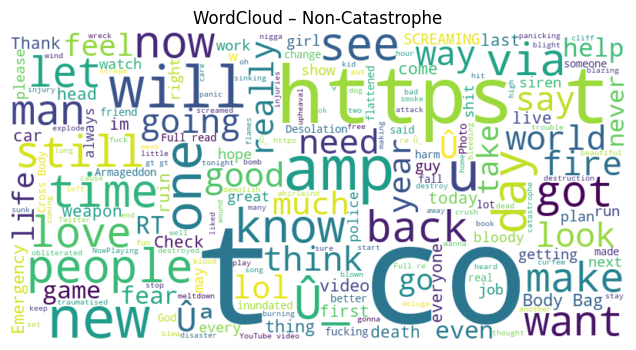

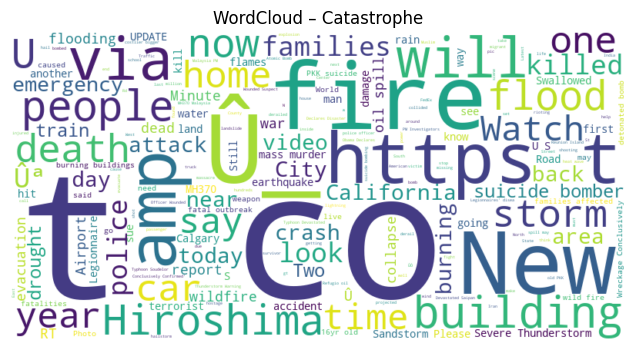

In [212]:
# Concaténer les textes par classe
text_0 = " ".join(df_0["text"])
text_1 = " ".join(df_1["text"])

# Générer les nuages de mots
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(text_0)
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(text_1)

# Affichage du WordCloud pour target = 0
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud – Non-Catastrophe")
plt.show()

# Affichage du WordCloud pour target = 1
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud – Catastrophe")
plt.show()

In [ ]:
# Concaténer les textes par classe
text_0 = " ".join(df_0["location"])
text_1 = " ".join(df_1["location"])

# Générer les nuages de mots
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(text_0)
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(text_1)

# Affichage du WordCloud pour target = 0
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud – Non-Catastrophe")
plt.show()

# Affichage du WordCloud pour target = 1
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud – Catastrophe")
plt.show()


## Ajout features

In [ ]:
# Nombre de caractères par tweet
df['char_count'] = df['text'].apply(len)

# Nombre de mots par tweet
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Nb de stop-words
df["stopword_count"] = df["text"].apply(
    lambda x: sum(1 for w in x.lower().split() if w in ENGLISH_STOP_WORDS)
)



In [ ]:
# Nombre total de mots dans chaque tweet
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Nombre de mots uniques dans chaque tweet
df['unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))

# Nombre de stopwords (mots vides comme 'le', 'et', 'mais'...) dans chaque tweet
df['stop_word_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# Nombre de liens URL présents dans chaque tweet
df['url_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# Longueur moyenne des mots dans chaque tweet
df['mean_word_length'] = df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Nombre total de caractères (lettres, espaces, ponctuations...) dans chaque tweet
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

# Nombre de signes de ponctuation dans chaque tweet
df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# Nombre de hashtags (#) dans chaque tweet
df['hashtag_count'] = df['text'].apply(lambda x: str(x).count('#'))

# Nombre de mentions (@) dans chaque tweet
df['mention_count'] = df['text'].apply(lambda x: str(x).count('@'))


## Analyse des features

In [ ]:
# Statistiques descriptives
df[['char_count', 'word_count', 'stop_word_count', 'url_count',
    'mean_word_length', 'punctuation_count', 'hashtag_count', 'mention_count']].describe()

,char_count,word_count,stop_word_count,url_count,mean_word_length,punctuation_count,hashtag_count,mention_count
count,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000
mean,102.319882,15.088780,4.729331,0.621457,6.125841,6.881299,0.445276,0.381102
std,33.405894,5.680351,3.512945,0.647448,1.633543,4.451471,1.002142,0.720715
min,8.000000,1.000000,0.000000,0.000000,2.333333,0.000000,0.000000,0.000000
25%,79.000000,11.000000,2.000000,0.000000,4.913043,4.000000,0.000000,0.000000
50%,109.000000,15.000000,4.000000,1.000000,5.947368,6.000000,0.000000,0.000000
75%,134.000000,19.000000,7.000000,1.000000,7.058824,10.000000,0.000000,1.000000
max,152.000000,30.000000,19.000000,4.000000,19.333333,61.000000,13.000000,7.000000


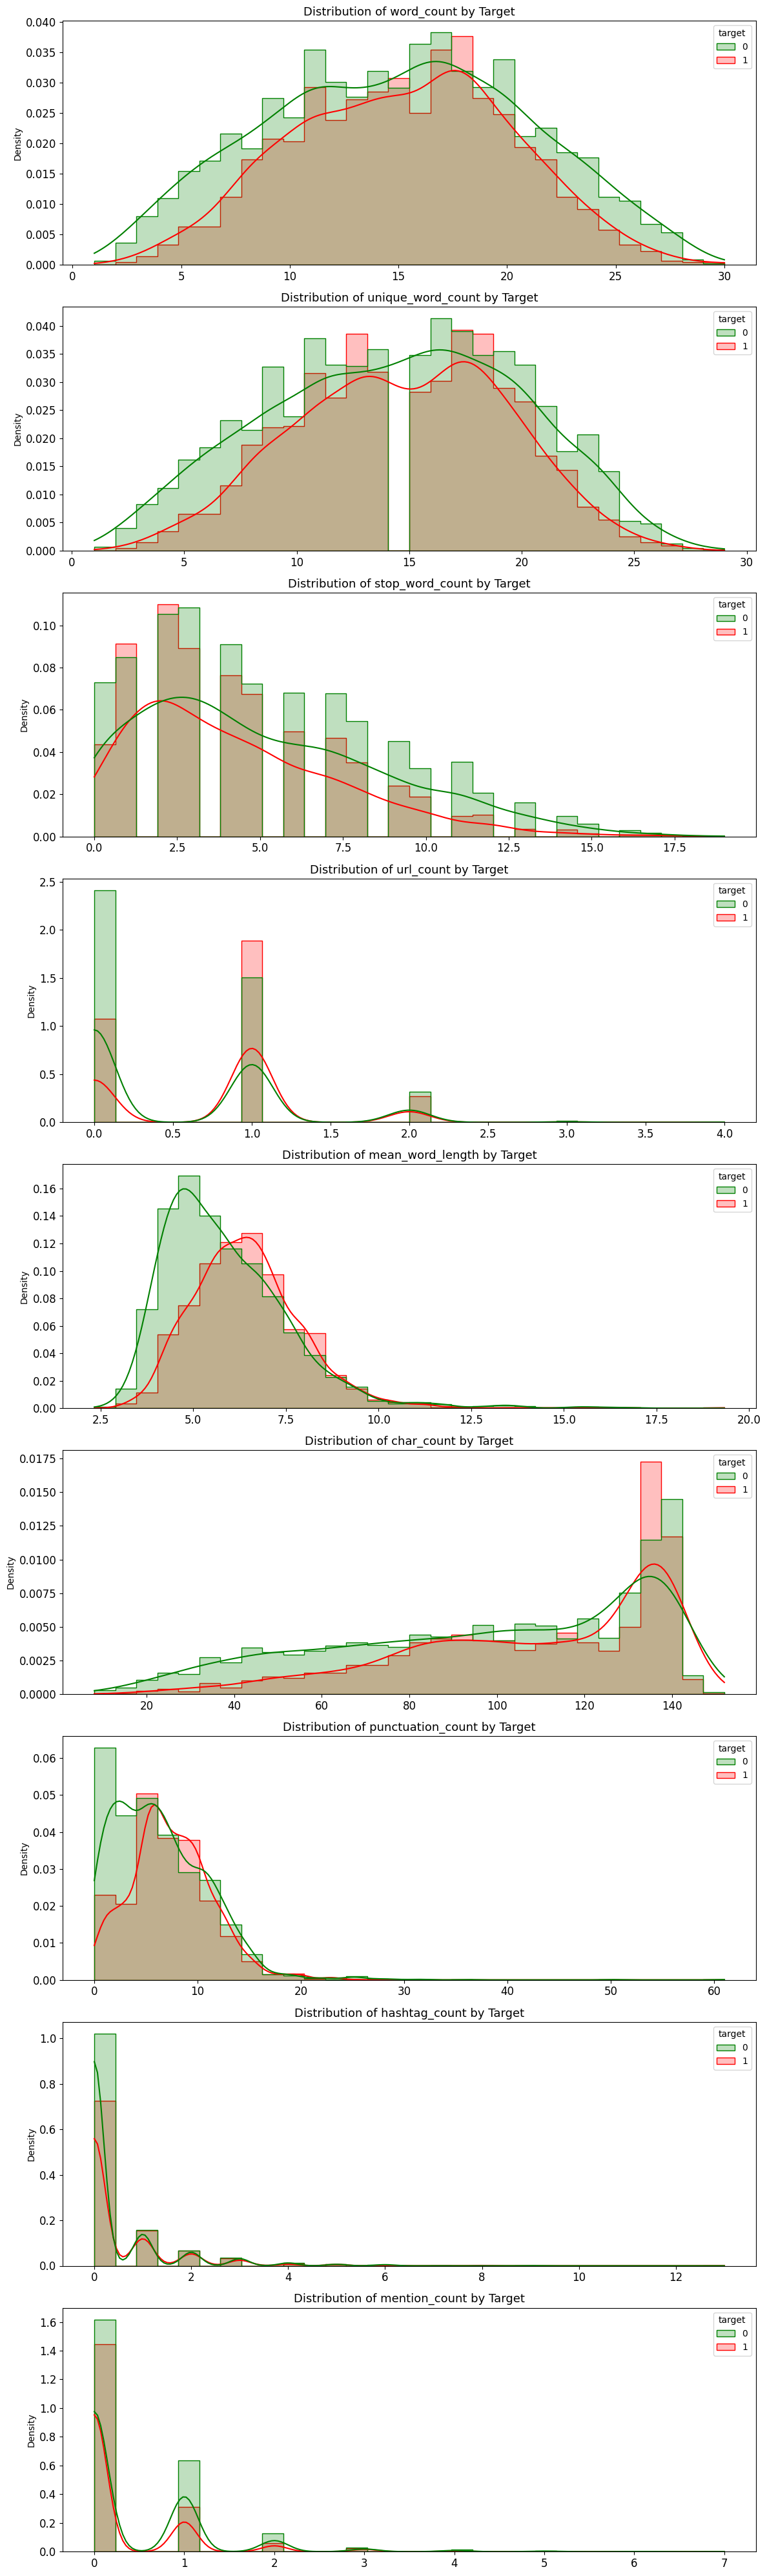

In [ ]:
# Liste des features à analyser
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count',
                'mean_word_length', 'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']

# Filtre pour les tweets liés à des catastrophes
DISASTER_TWEETS = df['target'] == 1

# Création de la figure avec sous-graphiques
fig, axes = plt.subplots(nrows=len(METAFEATURES), ncols=1, figsize=(12, 40), dpi=100)

# Pour chaque feature, on trace deux courbes : disaster vs non-disaster
for i, feature in enumerate(METAFEATURES):
    sns.histplot(data=df, x=feature, hue='target', kde=True, ax=axes[i], bins=30,
                 palette={0: "green", 1: "red"}, element="step", stat="density")
    
    axes[i].set_title(f'Distribution of {feature} by Target', fontsize=13)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range=(1, 1), top_n=20):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range)
    X = vec.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    sorted_words = sorted(word_freq, key=lambda x: x[1], reverse=True)
    return pd.DataFrame(sorted_words[:top_n], columns=['ngram', 'count'])

In [ ]:
print("Top 20 bigrams pour les tweets liés à une catastrophe (target=1) :")
print(get_top_ngrams(df[df['target'] == 1]['text'], ngram_range=(2, 2), top_n=20))

print("\nTop 20 bigrams pour les tweets non liés à une catastrophe (target=0) :")
print(get_top_ngrams(df[df['target'] == 0]['text'], ngram_range=(2, 2), top_n=20))



Top 20 bigrams pour les tweets liés à une catastrophe (target=1) :
                  ngram  count
0               û_ http     84
1     burning buildings     29
2        suicide bomber     29
3             oil spill     26
4       confirmed mh370     22
5   severe thunderstorm     21
6           mass murder     21
7         watch airport     21
8     airport swallowed     21
9   swallowed sandstorm     21
10     sandstorm minute     21
11          minute http     21
12             70 years     19
13         families sue     19
14     sue legionnaires     19
15          40 families     19
16    families affected     19
17       affected fatal     19
18       fatal outbreak     19
19             16yr old     19

Top 20 bigrams pour les tweets non liés à une catastrophe (target=0) :
                   ngram  count
0                û_ http     81
1             cross body     23
2          youtube video     21
3                  gt gt     20
4          liked youtube     20
5               û_

# Traitement des valeurs nuls ou non pertinentes

In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
print(df.shape)

(5080, 15)


In [ ]:
df.dropna(inplace=True)
print(df.shape) 
df.info()

(5080, 15)
<class 'pandas.core.frame.DataFrame'>
Index: 5080 entries, 31 to 7581
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5080 non-null   int64  
 1   keyword            5080 non-null   object 
 2   location           5080 non-null   object 
 3   text               5080 non-null   object 
 4   target             5080 non-null   int64  
 5   char_count         5080 non-null   int64  
 6   word_count         5080 non-null   int64  
 7   stopword_count     5080 non-null   int64  
 8   unique_word_count  5080 non-null   int64  
 9   stop_word_count    5080 non-null   int64  
 10  url_count          5080 non-null   int64  
 11  mean_word_length   5080 non-null   float64
 12  punctuation_count  5080 non-null   int64  
 13  hashtag_count      5080 non-null   int64  
 14  mention_count      5080 non-null   int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 635.0+ KB


In [ ]:
df.head()

,id,keyword,location,text,target,char_count,word_count,stopword_count,unique_word_count,stop_word_count,url_count,mean_word_length,punctuation_count,hashtag_count,mention_count
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,5,0,5,0,1,10.200000,6,0,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,10,4,10,3,1,5.800000,8,2,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,9,1,9,1,1,8.222222,9,1,0
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34,7,3,7,3,0,4.000000,1,0,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,13,7,13,5,1,4.923077,5,0,0


In [ ]:
df['target'].value_counts(normalize=True)

target
0    0.567717
1    0.432283
Name: proportion, dtype: float64

# Proportion target

In [ ]:

df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

# 2. Échantillonner aléatoirement la classe 0 pour avoir autant d'exemples que la classe 1
df_0_sampled = df_0.sample(n=len(df_1), random_state=42)

df_balanced = pd.concat([df_0_sampled, df_1], axis=0).sample(frac=1, random_state=42)  # shuffle le tout


In [ ]:

df_balanced['target'].value_counts(normalize=True)

target
1    0.5
0    0.5
Name: proportion, dtype: float64

In [ ]:
df_balanced['keyword'].value_counts()


keyword
collision                33
outbreak                 31
sandstorm                31
fatalities               30
emergency%20plan         29
                         ..
razed                     9
detonation                8
epicentre                 7
radiation%20emergency     6
inundation                3
Name: count, Length: 221, dtype: int64

# Analyse de notre dataset


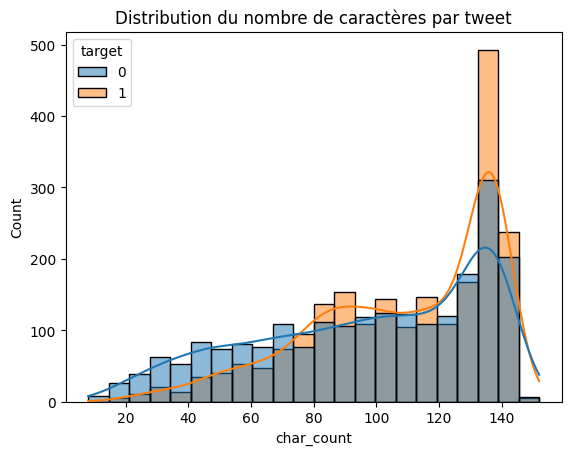

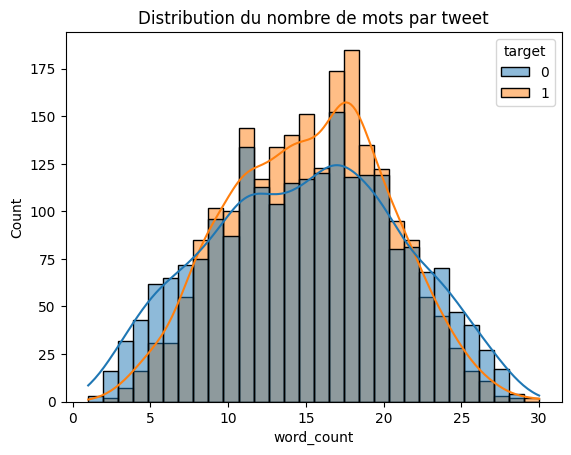

In [ ]:


sns.histplot(data=df_balanced, x='char_count', hue='target', kde=True)
plt.title("Distribution du nombre de caractères par tweet")
plt.show()

sns.histplot(data=df_balanced, x='word_count', hue='target', kde=True)
plt.title("Distribution du nombre de mots par tweet")
plt.show()


1. Distribution du nombre de caractères par tweet


La majorité des tweets sont entre 80 et 140 caractères.
Les tweets de catastrophe sont en moyenne plus longs.
Il y a un pic brutal à ~140 caractères pour les deux classes.
Les tweets catastrophes sont surement plus détaillés, plus descriptifs, ce qui donne une longueur moyenne plus élevée.


2. Distribution du nombre de mots par tweet

Les tweets catastrophes contiennent un peu plus de mots que les autres.
Le pic est autour de 14-18 mots pour les catastrophes, un peu plus bas pour les autres.


3. Interprétation globale : 

L’EDA montre que les tweets liés à des catastrophes réelles sont généralement un peu plus longs que les tweets non-catastrophes, à la fois en nombre de caractères et de mots. Cela reflète sans doute leur nature plus factuelle, urgente ou descriptive (ex : rapports d’incidents, alertes, témoignages). Cependant, les distributions restent proches : la longueur seule ne suffit pas à distinguer les classes, mais elle peut constituer un indice utile combiné à d'autres features (mots, n-grammes, keyword, etc.).

## Nettoyage

Passage en miniscule

In [ ]:
df_balanced['text'] = df_balanced['text'].str.lower()
df_balanced['keyword'] = df_balanced['keyword'].str.lower()

In [ ]:
df_balanced.head()

,id,keyword,location,text,target,char_count,word_count,stopword_count,unique_word_count,stop_word_count,url_count,mean_word_length,punctuation_count,hashtag_count,mention_count
6818,9765,trapped,10 Steps Ahead. Cloud 9,bomb head? explosive decisions dat produced mo...,1,134,21,6,20,6,0,5.428571,1,0,0
4842,6896,mass%20murder,"Huntsville, AL",okay not sure the word 'mass murder' applies d...,1,121,19,9,18,8,1,5.421053,8,0,0
5848,8356,ruin,Garrett,like why on earth would you want anybody to be...,0,101,17,6,17,8,0,5.000000,2,0,0
1851,2661,crush,"Cleveland, Ohio",my woman crush wedneday goes to the beautiful ...,0,108,12,3,12,3,1,8.083333,8,2,1
5729,8176,rescuers,Washington,#news: 'many deaths' in shipwreck: rescuers ar...,1,136,18,6,18,5,1,6.611111,14,1,1


Suppression liens /mentions / hashtags / ponctuation/chiffres

Suppression des stopwords et vectorisation


In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)      # URLs
    text = re.sub(r"@\w+|#\w+", "", text)           # Mentions & hashtags
    text = re.sub(r"[^a-z\s]", "", text)            # Ponctuation / chiffres
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Nettoyage de base
df_balanced["clean_text"] = df_balanced["text"].apply(clean_text)

# Tokenisation X
df_balanced["tokens"] = df_balanced["clean_text"].apply(lambda x: x.split())

# Suppression des stopwords
df_balanced["tokens"] = df_balanced["tokens"].apply(lambda tokens: [w for w in tokens if w not in stop_words])  


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sulivanmoreau/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Application 

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()


# Version 2 : Stopwords uniquement
df_balanced["version_stop"] = df_balanced["tokens"].apply(lambda x: " ".join(x))

# Version 3 : Stemming
df_balanced["version_stem"] = df_balanced["tokens"].apply(
    lambda tokens: " ".join([stemmer.stem(t) for t in tokens])
)

# Version 4 : Lemmatization
df_balanced["version_lemma"] = df_balanced["tokens"].apply(
    lambda tokens: " ".join([lemmatizer.lemmatize(t) for t in tokens])
)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sulivanmoreau/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sulivanmoreau/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sulivanmoreau/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df_balanced.head()

,id,keyword,location,text,target,char_count,word_count,stopword_count,unique_word_count,stop_word_count,url_count,mean_word_length,punctuation_count,hashtag_count,mention_count,clean_text,tokens,version_stop,version_stem,version_lemma
6818,9765,trapped,10 Steps Ahead. Cloud 9,bomb head? explosive decisions dat produced mo...,1,134,21,6,20,6,0,5.428571,1,0,0,bomb head explosive decisions dat produced mor...,"[bomb, head, explosive, decisions, dat, produc...",bomb head explosive decisions dat produced dea...,bomb head explos decis dat produc dead childre...,bomb head explosive decision dat produced dead...
4842,6896,mass%20murder,"Huntsville, AL",okay not sure the word 'mass murder' applies d...,1,121,19,9,18,8,1,5.421053,8,0,0,okay not sure the word mass murder applies dur...,"[okay, sure, word, mass, murder, applies, war,...",okay sure word mass murder applies war horrend...,okay sure word mass murder appli war horrend n...,okay sure word mass murder applies war horrend...
5848,8356,ruin,Garrett,like why on earth would you want anybody to be...,0,101,17,6,17,8,0,5.000000,2,0,0,like why on earth would you want anybody to be...,"[like, earth, would, want, anybody, unhappy, d...",like earth would want anybody unhappy dont pur...,like earth would want anybodi unhappi dont pur...,like earth would want anybody unhappy dont pur...
1851,2661,crush,"Cleveland, Ohio",my woman crush wedneday goes to the beautiful ...,0,108,12,3,12,3,1,8.083333,8,2,1,my woman crush wedneday goes to the beautiful,"[woman, crush, wedneday, goes, beautiful]",woman crush wedneday goes beautiful,woman crush wedneday goe beauti,woman crush wedneday go beautiful
5729,8176,rescuers,Washington,#news: 'many deaths' in shipwreck: rescuers ar...,1,136,18,6,18,5,1,6.611111,14,1,1,many deaths in shipwreck rescuers are trying t...,"[many, deaths, shipwreck, rescuers, trying, sa...",many deaths shipwreck rescuers trying save hun...,mani death shipwreck rescuer tri save hundr mi...,many death shipwreck rescuer trying save hundr...


In [ ]:
clean_df_0 = df_balanced[df_balanced['target'] == 0]
clean_df_1 = df_balanced[df_balanced['target'] == 1]

# Analyse de la récurrence des mots les plus fréquents

In [ ]:
# Fonction pour obtenir les mots les plus fréquents
def get_top_words(series, n=10):
    words = " ".join(series).lower().split()
    words = [w for w in words if w not in ENGLISH_STOP_WORDS]
    return Counter(words).most_common(n)

# Séparation des tweets selon la cible
clean_df_0 = df_balanced[df_balanced['target'] == 0]
clean_df_1 = df_balanced[df_balanced['target'] == 1]

# Extraction des top mots
top_words_0 = get_top_words(clean_df_0["clean_text"], 10)
top_words_1 = get_top_words(clean_df_1["clean_text"], 10)

# Tableau combiné
df_top_0 = pd.DataFrame(top_words_0, columns=["Mot (Non-catastrophe)", "Fréquence"])
df_top_1 = pd.DataFrame(top_words_1, columns=["Mot (Catastrophe)", "Fréquence"])
display(pd.concat([df_top_0, df_top_1], axis=1))


,Mot (Non-catastrophe),Fréquence,Mot (Catastrophe),Fréquence
0,im,137,police,80
1,like,122,amp,75
2,just,118,people,67
3,new,108,like,66
4,amp,97,disaster,66
5,dont,70,pm,64
6,body,60,buildings,63
7,emergency,50,just,63
8,video,49,suicide,61
9,people,48,killed,60


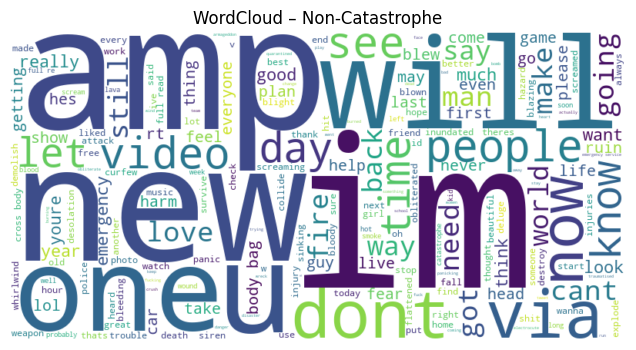

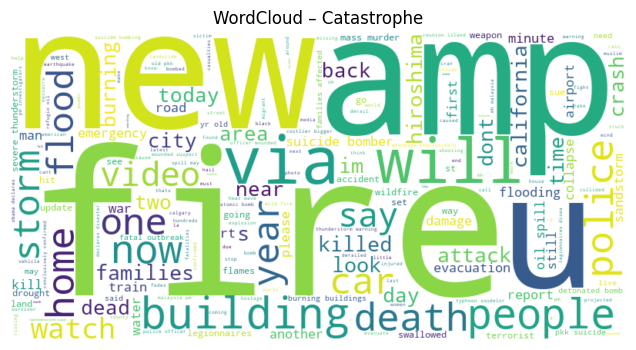

In [ ]:
# Concaténer les textes par classe
text_0 = " ".join(clean_df_0["clean_text"])
text_1 = " ".join(clean_df_1["clean_text"])

# Générer les nuages de mots
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(text_0)
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(text_1)

# Affichage du WordCloud pour target = 0
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud – Non-Catastrophe")
plt.show()

# Affichage du WordCloud pour target = 1
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud – Catastrophe")
plt.show()


In [ ]:
df_balanced.to_csv("tweets_clean.csv", index=False)
